In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for creating static, animated, and interactive visualizations
import seaborn as sns # for statistical data visualization
from sklearn.model_selection import train_test_split # splitting data into train and test sets
from sklearn.preprocessing import StandardScaler # feature scaling (standardizing data)
from sklearn.svm import SVC # Support Vector Classifier for classification tasks
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier (ensemble method)
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.metrics import classification_report, accuracy_score # evaluation metrics for classification

In [4]:
import os # for interacting with the operating system (file system operations)
for dirname, _, filenames in os.walk('/kaggle/input'):  # Iterating through files in the input directory
    for filename in filenames:  # For each file found in the directory
        print(os.path.join(dirname, filename))  # Print the full path of the file

In [5]:
# loadin the datset
data = pd.read_csv('/content/medical data.csv')

In [6]:
#   Verify Column Names
print(data.columns)

Index(['Name', 'DateOfBirth', 'Gender', 'Symptoms', 'Causes', 'Disease',
       'Medicine'],
      dtype='object')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         241 non-null    object
 1   DateOfBirth  241 non-null    object
 2   Gender       242 non-null    object
 3   Symptoms     247 non-null    object
 4   Causes       245 non-null    object
 5   Disease      249 non-null    object
 6   Medicine     242 non-null    object
dtypes: object(7)
memory usage: 15.8+ KB


In [9]:
data.isnull().sum()

,0
Name,46
DateOfBirth,46
Gender,45
Symptoms,40
Causes,42
Disease,38
Medicine,45


In [10]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Name           46
DateOfBirth    46
Gender         45
Symptoms       40
Causes         42
Disease        38
Medicine       45
dtype: int64


In [11]:
# Handling missing values---i use  Data Imputation
# Numeric Columns (DateOfBirth): I impute missing values using the mean or median.
data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'], errors='coerce')

# Calculate median excluding NaT values (Not a time)
median_date = data['DateOfBirth'].dropna().median()

# Fill missing values with the median date
data['DateOfBirth'].fillna(median_date, inplace=True)

# Categorical Columns (Gender, Symptoms, Causes, Disease, Medicine):I impute missing values with the mode (most frequent value).
categorical_columns = ['Gender', 'Symptoms', 'Causes', 'Disease', 'Medicine']
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [12]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Name    46
dtype: int64


In [13]:
# Handle the missing values in column Name by imputation method
data['Name'].fillna('Unknown', inplace=True)

In [14]:
data.isnull().sum()

,0
Name,0
DateOfBirth,0
Gender,0
Symptoms,0
Causes,0
Disease,0
Medicine,0


In [15]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [16]:
# Since most of my data is categorical, i want to encode it into a numerical format suitable for machine learning models.
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

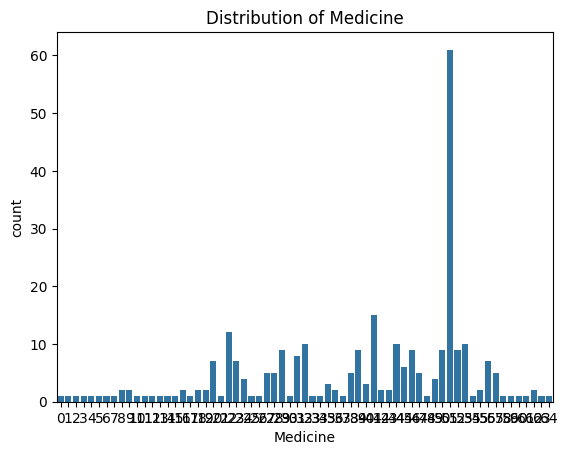

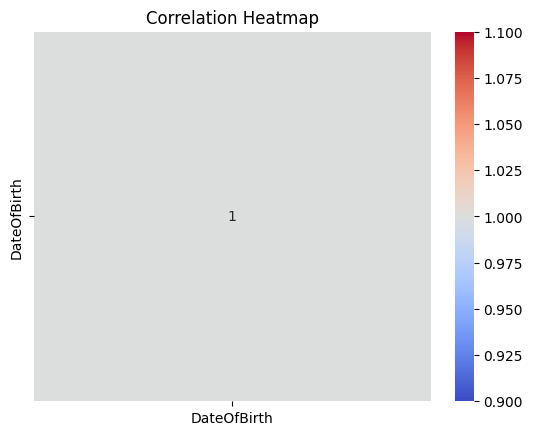

In [17]:
# Exploratory Data Analysis (EDA)
# Class distribution for Medicine
sns.countplot(data=data, x='Medicine')
plt.title('Distribution of Medicine')
plt.show()

# Correlation heatmap for numerical columns
numeric_columns = ['DateOfBirth']
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
# Data Processing : We need to encode categorical variables for the machine learning models.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

In [19]:
# splitting the datset: We divide the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

X = data.drop('Medicine', axis=1)
y = data['Medicine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Drop the DateOfBirth column from the datasets
X_train = X_train.drop('DateOfBirth', axis=1)
X_test = X_test.drop('DateOfBirth', axis=1)

# Fit the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.8448275862068966


In [21]:
# Random classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.896551724137931


In [22]:
# Logistic Regression (for binary classification)
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.5344827586206896


In [23]:
# model evaluation---lets Evaluate the models using accuracy, precision, recall, and F1-score.
from sklearn.metrics import classification_report

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         1
          20       1.00      0.50      0.67         2
          21       0.00      0.00      0.00         0
          22       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         3
          27       1.00      1.00      1.00         2
          28       0.50      1.00      0.67         1
          29       0.50      1.00      0.67         1
          31       1.00      1.00      1.00         3
          32       1.00      1.00      1.00         4
          35       0.00      0.00      0.00         0
          38       1.00      1.00      1.00 

**Decision Tree has an accuracy of 0.84 and an f1-score (weighted average) of 0.86.**



**Random Forest has an accuracy of 0.90 and an f1-score (weighted average) of 0.90.**




**Logistic Regression has an accuracy of 0.53 and an f1-score (weighted average) of 0.54.**




**Random Forest seems to be the best model among the three based on both accuracy and the f1-score, as it has the highest values for both metrics.**

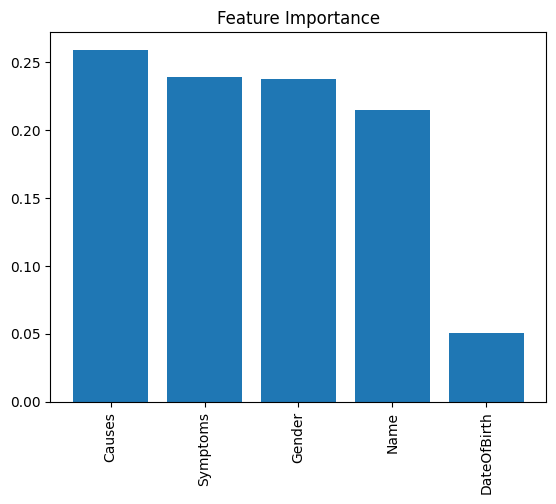

In [29]:
# Model Interpretation

import matplotlib.pyplot as plt

# lets get feature importances
importances = rf_classifier.feature_importances_

# lets sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(len(importances)), importances[indices]) # Corrected: Use len(importances) instead of X.shape[1]

# Add feature names as x-axis labels
plt.xticks(range(len(importances)), names, rotation=90) # Corrected: Use len(importances) instead of X.shape[1]

# Show plot
plt.show()

